In [1]:
pip install selenium

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB 9.6 MB/s eta 0:00:01
   --- ------------------------------------ 0.8/9.7 MB 9.7 MB/s eta 0:00:01
   ---- ----------------------------------- 1.2/9.7 MB 9.6 MB/s eta 0:00:01
   ------- -------------------------------- 1.7/9.7 MB 9.8 MB/s eta 0:00:01
   -------- ------------------------------- 2.1/9.7 MB 9.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.6/9.7 MB 9.8 MB/s eta 0:00:01
   ------------ --------------------------- 3.1/9.7 MB 9.8 MB/s eta 0:00:01
   -------------- ------------------------- 3.5/9.7 MB 9.7 MB/s eta 0:00:01
   ---------------- ----------------------- 4.0/9.7 MB 9.7 MB/s eta 0:00:01
   ----------------- ---------------------- 4.3/9.7 MB 9.5 MB/s eta 0:00:01
   ------------------- -------------------- 4.8/9.7 MB 9.8 MB/s eta 0:00:01
   --------------------- ------------------ 5.1/9.7 MB 9.6 MB/s eta 0:00:01
   ----------------

In [2]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup

In [6]:
driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()))   # 크롬 브라우저의 버전을 탐색한 다음, 버전에 맞는 웹드라이버를 다운로드하여 해당 경로를 셀레늄에 전달해 줌 

In [36]:
#순서대로 실행할 것!
url = "https://www.naver.com"
driver.get(url)

'<html lang="ko" class="fzoom" data-dark="false"><head><script async="" src="https://ntm.pstatic.net/ex/nlog.js"></script><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="
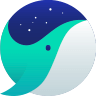
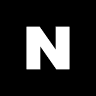

In [8]:
driver.page_source

In [37]:
driver.find_element(By.LINK_TEXT, value = "뉴스").click()

In [20]:
driver.back()

In [38]:
driver.find_element(By.CLASS_NAME, value = "search_input").send_keys("퀀트 투자 포트폴리오 만들기")


In [39]:
driver.find_element(By.CLASS_NAME, value = "btn_search").send_keys(Keys.ENTER)

In [40]:
driver.find_element(By.CLASS_NAME, value = "box_window").clear()

In [41]:
driver.find_element(By.CLASS_NAME, value = "box_window").send_keys("이현열 퀀트")

In [42]:
driver.find_element(By.CLASS_NAME, value = "bt_search").click()

In [44]:
driver.find_element(By.XPATH, value = '//*[@id="lnb"]/div[1]/div/div[1]/div/div[1]/div[1]/a').click()

In [46]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight)") #웹페이지의 가장 하단까지 스크롤을 내리라는 자바스크립트 명령어

In [47]:
# 웹페이지의 모든 검색 결과 나타내기
prev_height = driver.execute_script("return document.body.scrollHeight")

while True :
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

    curr_height = driver.execute_script("return document.body.scrollHeight")

    if (curr_height == prev_height) :
        break
    prev_height = curr_height

In [49]:
# 웹페이지의 모든 검색 결과가 나타났을 경우, 정적 크롤링을 통해 데이터 수집 가능
# 해당 페이지의 모든 컨텐츠 제목 뽑아내기
html = BeautifulSoup(driver.page_source)
txt = html.find_all(class_ = "title_link")
txt_list = [i.text for i in txt]
print(txt_list)

['<퀀트 투자 포트폴리오 만들기>, 좀 더 깊은 퀀트 투자를 위한', '01. 퀀트 투자란 무엇인가? 퀀트에 대해 알아보자!', '파이썬을 이용한 퀀트 투자 포트폴리오 만들기', '[리뷰] 퀀트투자 포트폴리오 만들기 (파이썬 활용)', '[책] 파이썬을 이용한 퀀트 투자 포트폴리오 만들기 (이현열)', '주식매매는 파이썬에게 맡겨보자! (서평/퀀트투자 포트폴리오 만들기)', '[서평] 파이썬을 이용한 퀀트 투자 포트폴리오 만들기', 'R을 이용한 퀀트 투자 포트폴리오 만들기: 정리하기 앞서', '연금저축펀드를 잠에서 깨워봅시다! (퀀트투자로 사계절 포트폴리오 만들기)', 'R을 이용한 퀀트 투자 포트폴리오 만들기 - Jpub(제이펍)', '퀀트 투자 포트폴리오 만들기', '《파이썬을 이용한 퀀트 투자 포트폴리오 만들기》 발간 안내', 'R을 이용한 퀀트 투자 포트폴리오 만들기', '[책]R을 이용한 퀀트 투자 포트폴리오 만들기/이현열 - R을 잘 몰라서 휘리릭 읽은 책', '[에필로그]R을 이용한 퀀트 투자 포트폴리오 만들기', '[퀀터스 추천인 : 작은오구] 게으른 나도 수익을 낼 수 있는 퀀트투자 전략적용 예시', 'Jpup : 퀀트투자 포트폴리오 만들기☆☆☆파이썬기초,데이터 크롤링 및 분석', '강환국 작가님의 거인의 포트폴리오, 퀀트투자 및 투자전략 소개', "'R을 이용한 퀀트 투자 포트폴리오 만들기' 따라하기(2) - 3장. API를 이용한 데이터 수집", '[책] 파이썬을 이용한 퀀트 투자 포트폴리오 만들기 (이현열, 제이펍, 2023년)', '데이터분석) 퀀트 투자 포트폴리오 만들기(패키지)', '[리뷰] R을 이용한 퀀트 투자 포트폴리오 만들기', '금융 AI의 이해', '독서: 퀀트 투자 무작정 따라 하기', '퀀트 투자/정량적 투자_ 도움이 될 만한 자료들', '[채권] 채권 투자의 새로운 기회: 시스템 투자', '갑자기, 백쿼트(`)가 안된다.', '《직장인이지만 공무원연금 받기로 했습니다》 계좌 개설부터 고수익 전략까지 연금 투자 무작

In [ ]:
'''
동적 페이지의 경우 셀레니움을 통해 웹페이지를 제어한 후 BeautifulSoup 패키지를 사용해 
원하는 부분을 추출하면 얼마든지 크롤링이 가능
'''

In [50]:
driver.quit()